In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bikeshare-data/bike_share.csv


In [4]:
data=pd.read_csv("/kaggle/input/bikeshare-data/bike_share.csv")

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
%matplotlib inline 

In [6]:
data.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [8]:
data.duplicated().sum()

21

In [11]:
data.drop_duplicates()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [12]:
data.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f2af6d38290> (for post_execute):


KeyboardInterrupt: 

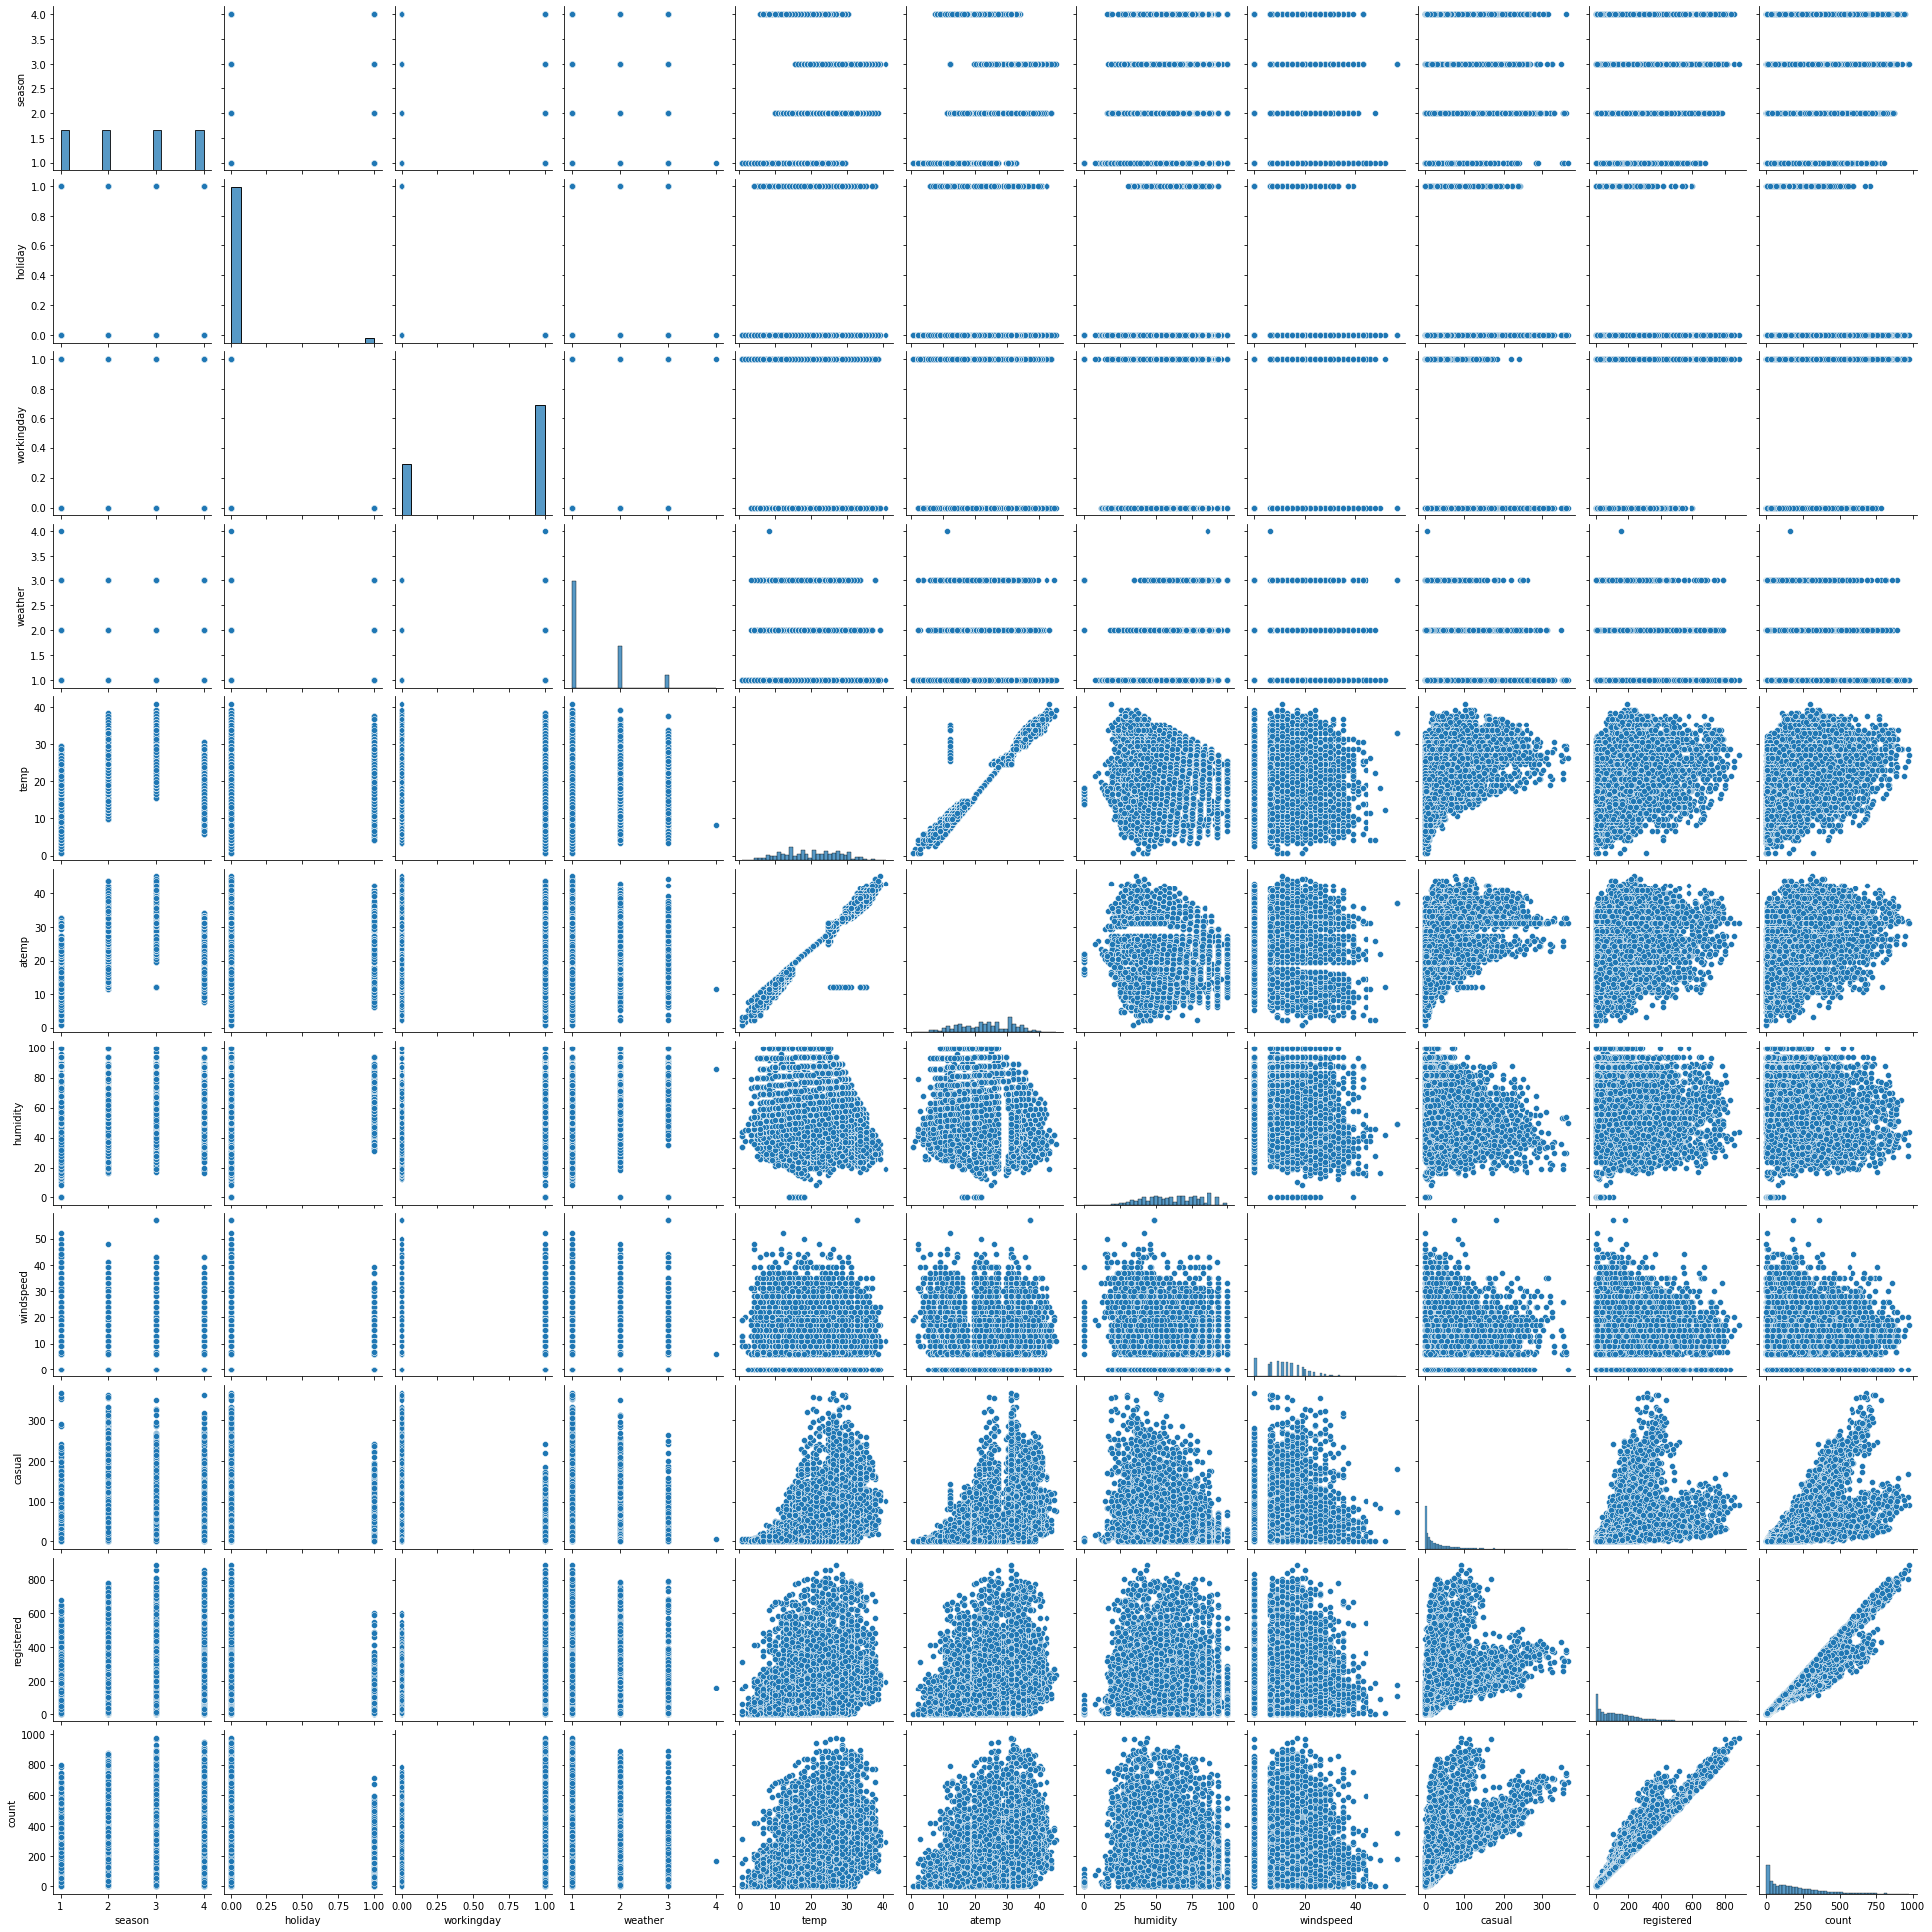

In [14]:
sns.pairplot(data)

<AxesSubplot:>

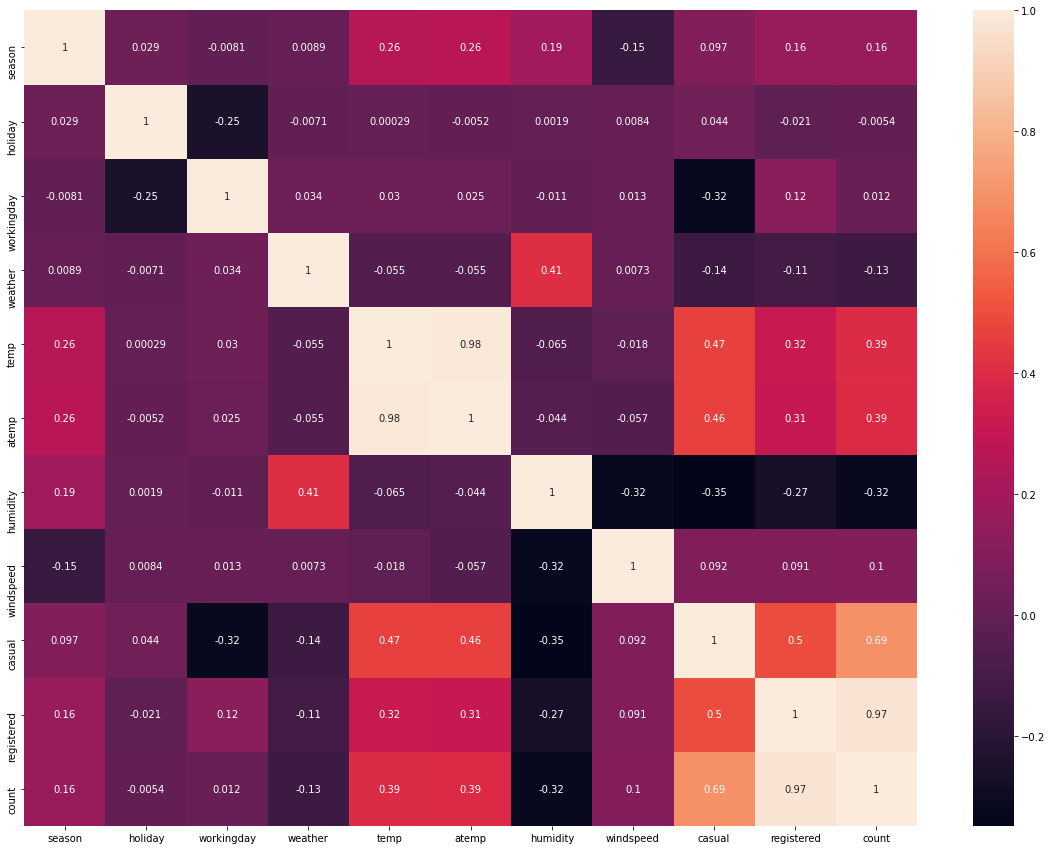

In [15]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
X = data.drop(columns="count")

In [18]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

NameError: name 'feature' is not defined

In [ ]:
#atemp and temp have high collinearity and hence dropping temp

In [ ]:
X = data.drop(columns=["count","temp"])

In [19]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature         VIF
0      season    6.820092
1     holiday    1.094765
2  workingday    4.072190
3     weather    7.355967
4        temp  263.959086
5       atemp  292.306415
6    humidity   12.913588
7   windspeed    3.076292
8      casual    3.269708
9  registered    3.195283


In [20]:
X = data.drop(columns=["count","temp"])

In [21]:
y = data["count"]

In [22]:
model = LinearRegression()

In [23]:
model.fit(X,y)

LinearRegression()

In [24]:
model.coef_


array([ 1.56009873e-14, -1.31690038e-13, -9.75187549e-15, -4.37529208e-15,
       -9.91880440e-16,  1.53774215e-15,  7.16105633e-17,  1.00000000e+00,
        1.00000000e+00])

In [25]:
model.intercept_

-3.979039320256561e-13

In [26]:
y_pred = model.predict(X)

In [27]:
y_pred

array([ 16.,  40.,  32., ..., 168., 129.,  88.])

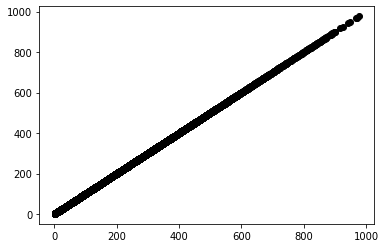

In [28]:
plt.scatter(data["count"],y_pred, color='black')
plt.show()

In [29]:
print("MSE : ",mean_squared_error(y,y_pred))

MSE :  8.504143551460136e-26


In [30]:
print("MAE : ",mean_absolute_error(y,y_pred))

MAE :  2.169010169178434e-13


In [31]:
print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))

RMSE :  2.9161864740547945e-13


In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

MAPE :  1.1970807428315813e-12


In [34]:
def linear_best_fit(X,y):
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    print("MSE : ",mean_squared_error(y,y_pred))
    print("MAE : ",mean_absolute_error(y,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
    print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

def mean_absolute_percentage_error(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100


In [35]:
linear_best_fit(X,y)

MSE :  8.504143551460136e-26
MAE :  2.169010169178434e-13
RMSE :  2.9161864740547945e-13
MAPE :  1.1970807428315813e-12


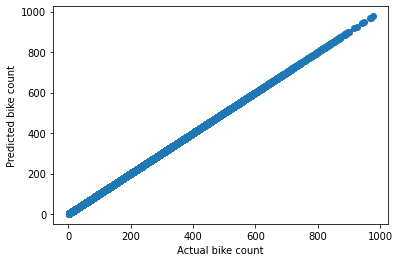

In [36]:
plt.xlabel("Actual bike count")
plt.ylabel("Predicted bike count")

plt.scatter(y, y_pred)

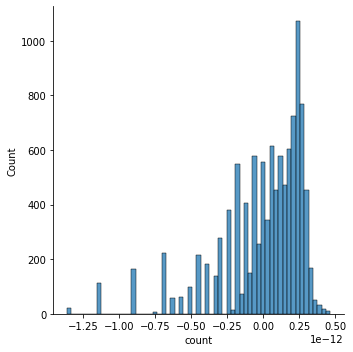

In [37]:
error = y-y_pred
sns.displot(error)

In [38]:
error = y-y_pred

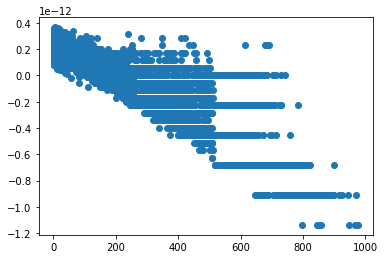

In [50]:
plt.scatter( y_pred, error)

In [39]:
X

,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered
0,1,0,0,1,14.395,81,0.0000,3,13
1,1,0,0,1,13.635,80,0.0000,8,32
2,1,0,0,1,13.635,80,0.0000,5,27
3,1,0,0,1,14.395,75,0.0000,3,10
4,1,0,0,1,14.395,75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,19.695,50,26.0027,7,329
10882,4,0,1,1,17.425,57,15.0013,10,231
10883,4,0,1,1,15.910,61,15.0013,4,164
10884,4,0,1,1,17.425,61,6.0032,12,117


In [40]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [41]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [42]:
X_train.head()


,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered
80,1,0,1,1,11.365,51,11.0014,12,66
1618,2,0,1,3,19.695,94,12.9980,6,158
4635,4,0,0,1,12.120,87,8.9981,0,5
7124,2,0,0,1,24.240,68,11.0014,4,6
5056,4,0,0,1,19.695,71,0.0000,10,161


In [43]:
X_test.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered
9978,4,0,1,1,16.665,61,8.9981,5,10
3218,3,0,1,2,31.820,89,6.0032,2,15
1512,2,0,1,2,14.395,93,16.9979,11,43
10183,4,0,1,1,21.210,44,8.9981,61,593
3412,3,0,1,1,31.060,57,12.9980,0,15


In [44]:
y_train

80       78
1618    164
4635      5
7124     10
5056    171
       ... 
9539    262
6815    306
5746    231
2717     26
3931    261
Name: count, Length: 7620, dtype: int64

In [45]:
y_test

9978      15
3218      17
1512      54
10183    654
3412      15
        ... 
9833      66
5928      17
3499     530
4141     183
3555      24
Name: count, Length: 3266, dtype: int64

In [46]:
linear_best_fit(X_train,y_train)

MSE :  1.0809823129847674e-24
MAE :  7.904238943158308e-13
RMSE :  1.0397029926785667e-12
MAPE :  4.3526652416508294e-12


In [47]:
linear_best_fit(X_test,y_test)

MSE :  5.982504736512815e-25
MAE :  5.890253923858662e-13
RMSE :  7.734665304014657e-13
MAPE :  3.5533359740307366e-12


In [ ]:
# train MAPE : 4.2
# test MAPE : 3.5

In [48]:
kf = KFold(n_splits=10)

In [49]:
i=1
test_result = []
for train_index, test_index in kf.split(X):
    train_X = X.loc[train_index]
    train_y = y[train_index]
    test_X = X.loc[test_index]
    test_y = y[test_index]
    
    model = LinearRegression()
    model.fit(train_X, train_y)

    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    train_mape = np.sqrt(mean_squared_error(train_y, train_pred))
    test_mape = np.sqrt(mean_squared_error(test_y, test_pred))
    print(i, "Fold")
    print("Train_RMSE = ",train_mape)
    print("Test RMSE = ",test_mape)
    
    test_result.append(test_mape)
    

1 Fold
Train_RMSE =  2.7722709452819037e-13
Test RMSE =  2.1507028101450401e-13
1 Fold
Train_RMSE =  5.635872343335277e-13
Test RMSE =  4.1949290150550014e-13
1 Fold
Train_RMSE =  7.626671429350255e-13
Test RMSE =  6.402955183076677e-13
1 Fold
Train_RMSE =  1.2279258027430818e-12
Test RMSE =  9.6749337001152e-13
1 Fold
Train_RMSE =  1.4487069768143997e-13
Test RMSE =  1.2567782853939518e-13
1 Fold
Train_RMSE =  1.0208847967740547e-12
Test RMSE =  8.293733500509166e-13
1 Fold
Train_RMSE =  1.1396535563957885e-12
Test RMSE =  1.3918894926580404e-12
1 Fold
Train_RMSE =  9.497544795107847e-13
Test RMSE =  1.2870592674209382e-12
1 Fold
Train_RMSE =  2.1025483328061551e-13
Test RMSE =  3.228259536639869e-13
1 Fold
Train_RMSE =  7.898460761692611e-14
Test RMSE =  9.105272863356883e-14


In [50]:
np.mean(test_result)

6.290230691806038e-13

In [52]:
np.std(test_result)

4.4962109159759676e-13

In [53]:
model = LinearRegression()
np.mean(np.abs(cross_val_score(model, X, y, scoring = 'neg_root_mean_squared_error', cv = 10)))

6.290230691806038e-13

In [54]:
import sklearn
sklearn.__version__

'0.23.2'

In [55]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [56]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
train_pred = model.predict(X_train)

In [59]:
test_pred = model.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_train, train_pred))

1.0397029926785667e-12

In [61]:
np.sqrt(mean_squared_error(y_test, test_pred))

1.0402297035654464e-12

In [62]:
((101989.58718331138-100780.44137721983)/101989.58718331138)*100

1.1855580941986594

In [63]:
r2 = r2_score(y_train, train_pred)

In [64]:
r2

1.0

In [ ]:
n, p = X_train.shape[0], X_train.shape[1]

In [66]:
X_train.shape

(7620, 9)

In [67]:
r2

1.0